# Word embeddings

As mentioned in the lecture, there are 2 ways to go along word embeddings:
1. You can learn word embeddings jointly with the main task you want to perform.
2. You can load pre-computed word embeddings.

## 1. Train your own embedding

Let's import the packages that you'll use in this lab. You'll need quite a few `keras` libraries along with `numpy`. 

In [410]:
from numpy import array
import numpy as np
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from sklearn.manifold import TSNE

To illustrate the system of embedding, let's have a look at a small data set that contains 10 short reviews of movies. We create a list of movie reviews along with a `review_labels` object that stores whether the review is positive (1) or negative (0).

In [411]:
# "reviews" stores 10 reviews
reviews = ['This is a horrible movie!',
        'I think this is the best performance ever encountered by Brad Pitt',
        'Not historically accurate at all',
        'Loved the plot twist!',
        'This is my favorite movie of all time!',
        'I hated this movie!',
        'The scenery is beautiful',
        'Not worth watching',
        'The storyline does not make sense',
        'What a waste of my time!']
# label good and bad reviews
review_labels = array([0,1,0,1,1,0,1,0,0,0])

### 1.1 Word embedding using the Tokenizer API

First, let's define how many words we want to keep in our vocabulary. Our data set is very short, so we are probably OK using only 50 words in our vocabulary.

In [412]:
n_words = 50

Now, let's use the Tokenizer API.

In [413]:
tokenizer = Tokenizer(num_words = n_words)
tokenizer.fit_on_texts(reviews)
reviews_encoded = tokenizer.texts_to_sequences(reviews)

Print out `reviews_encoded`

In [414]:
reviews_encoded

[[1, 2, 6, 12, 4],
 [7, 13, 1, 2, 3, 14, 15, 16, 17, 18, 19, 20],
 [5, 21, 22, 23, 8],
 [24, 3, 25, 26],
 [1, 2, 9, 27, 4, 10, 8, 11],
 [7, 28, 1, 4],
 [3, 29, 2, 30],
 [5, 31, 32],
 [3, 33, 34, 5, 35, 36],
 [37, 6, 38, 10, 9, 11]]

In [415]:
np.shape(reviews_encoded)

(10,)

You'll notice that the encoded reviews have different lengths. Keras will need inputs to be vectorized, and all inputs will have to be padded in order to ensure they have the same length. You can use `pad_sequences` to do this. Let's specify a `max_sentence_length` of 15:

In [416]:
max_sentence_length = 15
padded_reviews = pad_sequences(reviews_encoded, maxlen=max_sentence_length)

In [417]:
padded_reviews

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  2,  6, 12,  4],
       [ 0,  0,  0,  7, 13,  1,  2,  3, 14, 15, 16, 17, 18, 19, 20],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5, 21, 22, 23,  8],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 24,  3, 25, 26],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  2,  9, 27,  4, 10,  8, 11],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  7, 28,  1,  4],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3, 29,  2, 30],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5, 31, 32],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  3, 33, 34,  5, 35, 36],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 37,  6, 38, 10,  9, 11]],
      dtype=int32)

You can specify padding = 'pre' or padding = 'post'

In [418]:
np.shape(padded_reviews)

(10, 15)

Now, let's build the model. Start with specifying the model as a `Sequential()` model.  You'll need to add an embedding layer. You can do this using `model.add` and then `Embedding`.

you'll have to specify 3 arguments:
- `input_dim`: the number of words in your vocabulary. In our case, this is equal to `n_words` (50).
- `output_dim`: The size of the vector space of the embedding vector. We're working with a fairly small data set here, so let's define an embedding space accordingly (12)
- `input_length`: This the length of the sentences, so equal to `max_sentence_length` in our example.

Let's build a simple one-layer densely connected network that uses the embedding layer. You can add one dense layer with a sigmoid activation. Compile the model (optimizer 'RMSprop') and print the model summary so you can have a look at the parameters. 

Make sure to flatten your embedding layer to a 180-element vector to pass it on to the dense layer.

In [419]:
# define the model
model = Sequential()
model.add(Embedding(input_dim = n_words, output_dim = 12, input_length= max_sentence_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['acc'])

model.summary()
#note that Parameter # in the embedding layer is 15 * 12.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_36 (Embedding)     (None, 15, 12)            600       
_________________________________________________________________
flatten_31 (Flatten)         (None, 180)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 181       
Total params: 781
Trainable params: 781
Non-trainable params: 0
_________________________________________________________________


In [424]:
# fit the model
model.fit(padded_reviews, review_labels, epochs=20, verbose=0)

# evaluate the model
loss, accuracy = model.evaluate(padded_reviews, review_labels, verbose=0)

In [425]:
loss

0.43128958344459534

In [426]:
accuracy

0.800000011920929

The advantage of using the tokenizer is that a vocabulary is stored. Using `word_index` on the `tokenizer` object, you can have a look at the dictionary.

In [427]:
word_index = tokenizer.word_index

word_index

{'a': 6,
 'accurate': 22,
 'all': 8,
 'at': 23,
 'beautiful': 30,
 'best': 14,
 'brad': 19,
 'by': 18,
 'does': 34,
 'encountered': 17,
 'ever': 16,
 'favorite': 27,
 'hated': 28,
 'historically': 21,
 'horrible': 12,
 'i': 7,
 'is': 2,
 'loved': 24,
 'make': 35,
 'movie': 4,
 'my': 9,
 'not': 5,
 'of': 10,
 'performance': 15,
 'pitt': 20,
 'plot': 25,
 'scenery': 29,
 'sense': 36,
 'storyline': 33,
 'the': 3,
 'think': 13,
 'this': 1,
 'time': 11,
 'twist': 26,
 'waste': 38,
 'watching': 32,
 'what': 37,
 'worth': 31}

We've used an embedding layer, but what do our word embeddings look like?

In [428]:
embedding_layer = model.layers[0].get_weights()[0]
embedding_layer

array([[ 0.07919858,  0.0679182 ,  0.08532567, -0.11380879, -0.04645944,
        -0.05434047, -0.06392208,  0.08127487,  0.04535653, -0.06651495,
         0.07330054, -0.075877  ],
       [-0.04365373,  0.02017307, -0.04471115, -0.10848062,  0.06277847,
        -0.07796951,  0.08853772,  0.05637849, -0.05499237, -0.07732692,
        -0.02948613,  0.08657829],
       [-0.11564074, -0.08235232,  0.02150699,  0.11446372,  0.02144285,
         0.05577567, -0.07481159,  0.02684835, -0.04971245,  0.0408558 ,
        -0.08270697, -0.03475602],
       [-0.07851718,  0.09032966, -0.08775849,  0.04243078, -0.04385317,
        -0.09878672,  0.07223155, -0.09097853, -0.02741705,  0.10700429,
        -0.04134813,  0.02487213],
       [-0.04662213,  0.11477876, -0.02459642,  0.10387751, -0.12802272,
         0.10479152, -0.07373875,  0.0484083 , -0.10089989, -0.01477046,
         0.06066347,  0.03754882],
       [ 0.06040209, -0.06328929,  0.03589354,  0.0722242 ,  0.0811155 ,
        -0.01183047,  

This surely isn't very informative. It would be great if we can visualize this. We can use t-SNE to do this. 

In [429]:
np.shape(embedding_layer)

(50, 12)

In [430]:
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]

# Set figure width and height to 9
fig_size[0] = fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

[t-SNE] Computing 49 nearest neighbors...
[t-SNE] Indexed 50 samples in 0.000s...
[t-SNE] Computed neighbors for 50 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 50 / 50
[t-SNE] Mean sigma: 0.201329
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.983784
[t-SNE] Error after 2000 iterations: 0.135311


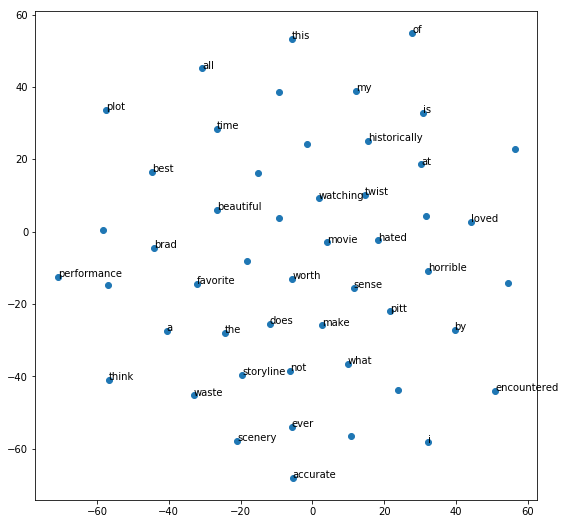

In [431]:
tsne = TSNE(n_components=2, random_state=123, verbose=1, n_iter=2000)
transformed_weights = tsne.fit_transform(embedding_layer)

x_coord = transformed_weights[:, 0]
y_coord = transformed_weights[:, 1]

plt.scatter(x_coords, y_coords)
for index, x, y in zip(word_index, x_coords, y_coords):
  plt.annotate(index, xy=(x, y), xytext=(0, 0), textcoords='offset points')

This word cloud give you a visual representation of the word embeddings. Note that this particular embedding isn't necessarily very useful. While worde like "horrible" and "hated" are close to each other, so is "love". Note that word embeddings will become more accurate when trained on bigger data. When you are using a data set that is small like this one, you'll probably want to use a pre-trained word embedding, which you'll learn about later.

### 1.2 Word embedding using `one_hot()` : hashing

Another way to encode your sentences is done through the use of the `one_hot` function in Keras. Using `one_hot()`, you create a hash of each word, which is an efficient way of encoding vectors. Note that hash collision will likely take place. This way of encoding is especially useful when you have big data sets, as creating explicit dictionaries as done by the Tokenizer API is time-consuming. 

Let's convert the words into integers. You use one_hot: not actually one-hot but numbers vector. uses hashing!

https://machinelearningmastery.com/prepare-text-data-deep-learning-keras/

https://www.quora.com/Can-you-explain-feature-hashing-in-an-easily-understandable-way

https://en.wikipedia.org/wiki/Feature_hashing 

In [432]:
# integer encode the documents using the hashing trick
n_words = 50
reviews_encoded = [one_hot(review, n_words) for review in reviews]
reviews_encoded

[[40, 43, 14, 22, 24],
 [13, 17, 40, 43, 11, 17, 30, 7, 12, 43, 47, 10],
 [43, 44, 9, 8, 21],
 [16, 11, 17, 46],
 [40, 43, 21, 5, 24, 23, 21, 16],
 [13, 2, 40, 24],
 [11, 16, 43, 23],
 [43, 17, 45],
 [11, 6, 18, 43, 9, 28],
 [12, 14, 4, 23, 21, 16]]

In [433]:
# pad the reviews to a maximum of 15 words
max_sentence_length = 15
padded_reviews = pad_sequences(reviews_encoded, maxlen=max_sentence_length, padding='pre')
padded_reviews

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 40, 43, 14, 22, 24],
       [ 0,  0,  0, 13, 17, 40, 43, 11, 17, 30,  7, 12, 43, 47, 10],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 43, 44,  9,  8, 21],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 16, 11, 17, 46],
       [ 0,  0,  0,  0,  0,  0,  0, 40, 43, 21,  5, 24, 23, 21, 16],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 13,  2, 40, 24],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 11, 16, 43, 23],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 43, 17, 45],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 11,  6, 18, 43,  9, 28],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 12, 14,  4, 23, 21, 16]],
      dtype=int32)

Now, rebuild the model using the new `padded_reviews` created using 

In [442]:
# define the model
model = Sequential()
model.add(Embedding(input_dim = n_words, output_dim = 12, input_length= max_sentence_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_38 (Embedding)     (None, 15, 12)            600       
_________________________________________________________________
flatten_33 (Flatten)         (None, 180)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 181       
Total params: 781
Trainable params: 781
Non-trainable params: 0
_________________________________________________________________


In [443]:
# fit the model
model.fit(padded_reviews, review_labels, epochs=20, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_reviews, review_labels, verbose=0)

In [444]:
loss

0.6009558439254761

In [445]:
accuracy

0.699999988079071

Even though collision takes place, the loss in accuracy is generally negligible. As you don't have a vocabulary anymore, however, making a labeled T-sne plot isn't feasible here.

## 2. Use pre-trained word embeddings

# SOURCES

https://github.com/keras-team/keras/issues/5204

In [ ]:
https://medium.com/@aneesha/using-tsne-to-plot-a-subset-of-similar-words-from-word2vec-bb8eeaea6229